<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/TensorFlow_and_PyTorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Fashion MNIST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation, Add, ZeroPadding2D, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import datasets

from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomCrop, GaussianNoise

In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
def plot_loss_acc(result):
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))

    ax[0].plot(result.history['loss'], label = 'Train Loss')
    ax[0].plot(result.history['val_loss'], label = 'Test Loss')
    ax[0].set_title('Model Loss')
    ax[0].legend()

    ax[1].plot(result.history['accuracy'], label = 'Train Acc')
    ax[1].plot(result.history['val_accuracy'], label = 'Test Acc')
    ax[1].set_title('Model Accuracy')
    ax[1].legend()

    plt.show()

In [ ]:
fashion_mnist = datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f'X_train shape: {X_train.shape} | X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape} | y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28) | X_test shape: (10000, 28, 28)
y_train shape: (60000,) | y_test shape: (10000,)


In [ ]:
labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

no_of_classes = len(labels)

In [ ]:
image = X_train[0]/255
label = y_train[0]

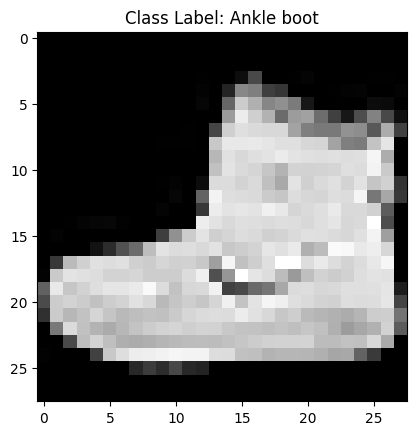

In [ ]:
fig, ax = plt.subplots()
plt.imshow(image.squeeze(), cmap = "gray")
ax.set_title(f'Class Label: {labels[label]}')
plt.show();

In [ ]:
X_train = X_train.reshape(X_train.shape +  (1,))/255
X_test = X_test.reshape(X_test.shape +  (1,))/255

In [ ]:
input_shape = X_train[0].shape

## Base Model (Model 1)

In [ ]:
i = Input(shape = input_shape)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(filters = 256, kernel_size = (2, 2), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_1 = Model(i, x)

In [ ]:
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 13, 13, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 256)           │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 360,714 (1.38 MB)

 Trainable params: 360,714 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
result_1 = model_1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7324 - loss: 0.7167 - val_accuracy: 0.8550 - val_loss: 0.4036
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8649 - loss: 0.3613 - val_accuracy: 0.8658 - val_loss: 0.3650
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8861 - loss: 0.3045 - val_accuracy: 0.8840 - val_loss: 0.3213
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8977 - loss: 0.2711 - val_accuracy: 0.8864 - val_loss: 0.3142
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9112 - loss: 0.2372 - val_accuracy: 0.8843 - val_loss: 0.3259
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9182 - loss: 0.2140 - val_accuracy: 0.8883 - val_loss: 0.3235
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9260 - loss: 0.1943 - val_accuracy: 0.9000 - val_loss: 0.3123
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9337 - loss: 0.174

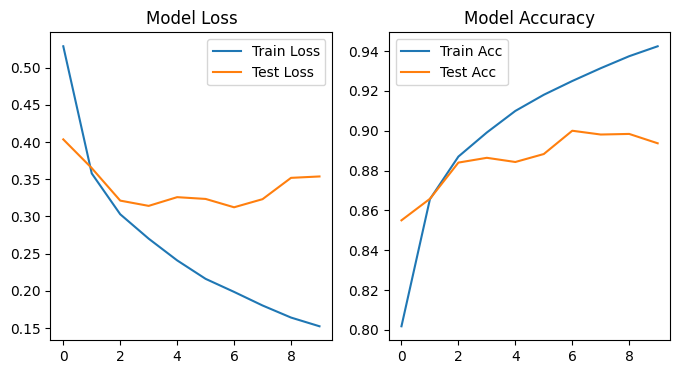

In [ ]:
plot_loss_acc(result_1)

## Improving Result - Data Augmentation and Batch Normalization

In [ ]:
def data_augmentation(flip = 'horizontal', rotation = 0.1, zoom = 0.1, cropped_size = (26, 26), stddev = 0.01):
    return Sequential([
        RandomFlip(flip),
        RandomRotation(rotation),
        RandomZoom(zoom),
        RandomCrop(height = cropped_size[0], width = cropped_size[1]),
        GaussianNoise(stddev = stddev)
    ])

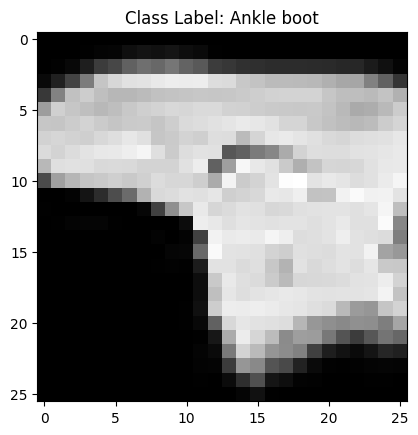

In [ ]:
#try augmenting an image
augmentation = data_augmentation()
image = augmentation(X_train[0]).numpy()

fig, ax = plt.subplots()
plt.imshow(image.squeeze(), cmap = "gray")
ax.set_title(f'Class Label: {labels[label]}')
plt.show();

In [ ]:
def CNN_Model(input_shape, no_of_classes, data_augmentation = None, batch_normalization = False):

    i = Input(shape = input_shape)

    if data_augmentation is not None:
        x = data_augmentation(i)

    if batch_normalization == True:
        x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
        x = BatchNormalization()(x)
        x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

        x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
        x = BatchNormalization()(x)
        x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

        x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
        x = BatchNormalization()(x)
        x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

        x = Flatten()(x)
        x = Dropout(rate = 0.2)(x)
        x = Dense(units = 512, activation = 'relu')(x)
        x = Dropout(rate = 0.2)(x)
        x = Dense(units = no_of_classes, activation = 'softmax')(x)

    else:
        x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(i)
        x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)
        x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
        x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)
        x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
        x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)
        x = Flatten()(x)
        x = Dropout(rate = 0.2)(x)
        x = Dense(units = 512, activation = 'relu')(x)
        x = Dropout(rate = 0.2)(x)
        x = Dense(units = no_of_classes, activation = 'softmax')(x)

    return Model(i, x)

In [ ]:
model_2 = CNN_Model(input_shape, no_of_classes)

In [ ]:
model_2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 881,898 (3.36 MB)

 Trainable params: 881,898 (3.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
result_2 = model_2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7681 - loss: 0.6242 - val_accuracy: 0.8897 - val_loss: 0.3089
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8976 - loss: 0.2766 - val_accuracy: 0.9044 - val_loss: 0.2563
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9124 - loss: 0.2332 - val_accuracy: 0.9125 - val_loss: 0.2386
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9259 - loss: 0.2030 - val_accuracy: 0.9112 - val_loss: 0.2448
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9319 - loss: 0.1820 - val_accuracy: 0.9243 - val_loss: 0.2205
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9388 - loss: 0.1646 - val_accuracy: 0.9220 - val_loss: 0.2296
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9458 - loss: 0.1442 - val_accuracy: 0.9260 - val_loss: 0.2155
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9488 - loss: 0.13

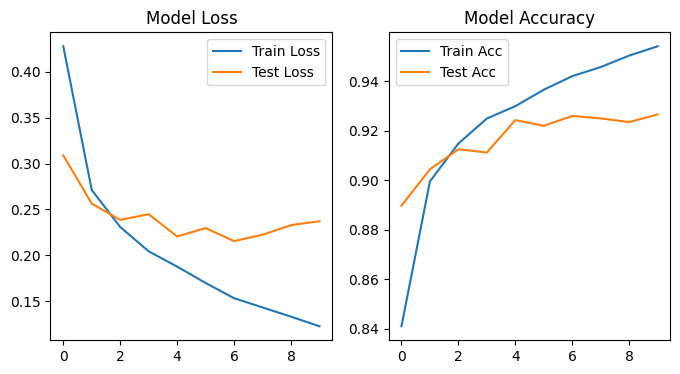

In [ ]:
plot_loss_acc(result_2)

In [ ]:
augmentation = data_augmentation()

model_3 = CNN_Model(input_shape, no_of_classes, data_augmentation = augmentation, batch_normalization = True)

In [ ]:
model_3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 26, 26, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 6, 6, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 883,690 (3.37 MB)

 Trainable params: 882,794 (3.37 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model_3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
result_3 = model_3.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.6604 - loss: 0.9779 - val_accuracy: 0.7904 - val_loss: 0.5511
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - accuracy: 0.7897 - loss: 0.5748 - val_accuracy: 0.8034 - val_loss: 0.5256
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8132 - loss: 0.5064 - val_accuracy: 0.8220 - val_loss: 0.5008
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8302 - loss: 0.4652 - val_accuracy: 0.8301 - val_loss: 0.4726
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8379 - loss: 0.4410 - val_accuracy: 0.8540 - val_loss: 0.4023
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8499 - loss: 0.4180 - val_accuracy: 0.8729 - val_loss: 0.3478
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8562 - loss: 0.3955 - val_accuracy: 0.8674 - val_loss: 0.3627
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8599 -

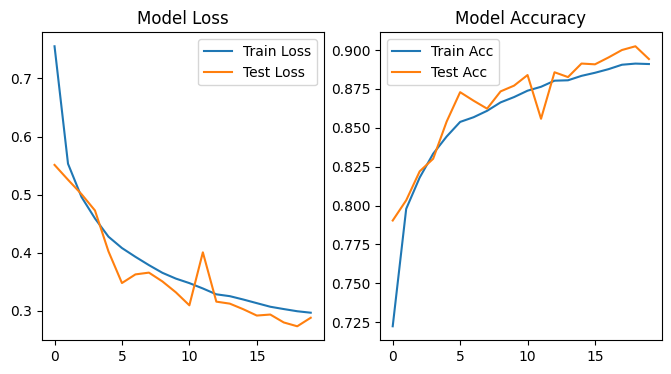

In [ ]:
plot_loss_acc(result_3)

In [ ]:
# Try more epochs

result_4 = model_3.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8932 - loss: 0.2936 - val_accuracy: 0.9012 - val_loss: 0.2718
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8954 - loss: 0.2890 - val_accuracy: 0.8966 - val_loss: 0.2861
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8945 - loss: 0.2871 - val_accuracy: 0.8977 - val_loss: 0.2830
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8945 - loss: 0.2855 - val_accuracy: 0.8921 - val_loss: 0.2836
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8999 - loss: 0.2764 - val_accuracy: 0.9052 - val_loss: 0.2629
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8980 - loss: 0.2809 - val_accuracy: 0.8870 - val_loss: 0.3126
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8976 - loss: 0.2766 - val_accuracy: 0.9030 - val_loss: 0.2601
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9012 -

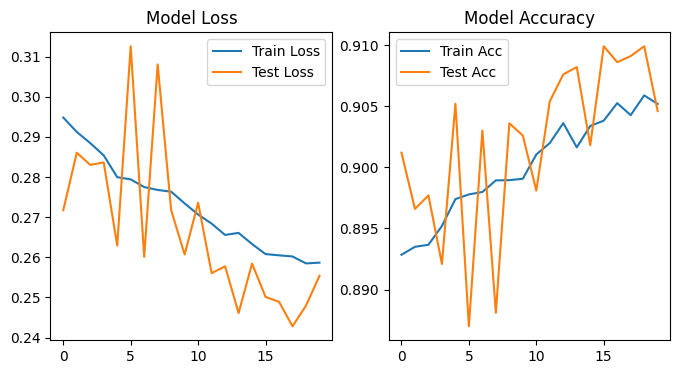

In [ ]:
plot_loss_acc(result_4)

## Experiment on Con2D -> BatchNorm -> ReLU

In [ ]:
def CNN_Model_Variant(input_shape, no_of_classes, data_augmentation = None, batch_normalization = False):

    i = Input(shape = input_shape)

    if data_augmentation is not None:
        x = data_augmentation(i)

    if batch_normalization == True:
        x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

        x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

        x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

    else:
        x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(i)
        x = Activation('relu')(x)
        x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

        x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
        x = Activation('relu')(x)
        x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

        x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
        x = Activation('relu')(x)
        x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

    x = Flatten()(x)
    x = Dropout(rate = 0.2)(x)
    x = Dense(units = 512, activation = 'relu')(x)
    x = Dropout(rate = 0.2)(x)
    x = Dense(units = no_of_classes, activation = 'softmax')(x)

    return Model(i, x)

In [ ]:
model_4 = CNN_Model_Variant(i, x)

In [ ]:
model_4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
result_4 = model_4.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.6485 - loss: 0.9785 - val_accuracy: 0.7681 - val_loss: 0.6242
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7805 - loss: 0.5964 - val_accuracy: 0.7990 - val_loss: 0.5615
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8089 - loss: 0.5219 - val_accuracy: 0.8430 - val_loss: 0.4511
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8295 - loss: 0.4642 - val_accuracy: 0.8546 - val_loss: 0.4079
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8390 - loss: 0.4440 - val_accuracy: 0.8447 - val_loss: 0.4243
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8470 - loss: 0.4203 - val_accuracy: 0.8574 - val_loss: 0.3921
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8602 - loss: 0.3844 - val_accuracy: 0.8816 - val_loss: 0.3422
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8590 -

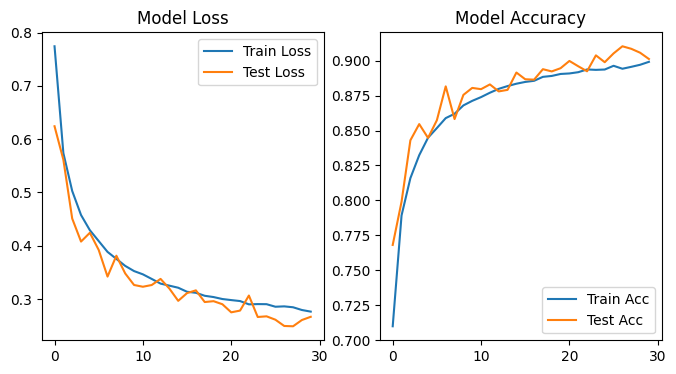

In [ ]:
plot_loss_acc(result_4)

## Experiment on a more sophisticated model

In [ ]:
i = Input(shape = input_shape)
x = augmentation(i)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_5 = Model(i, x)

In [ ]:
model_5.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 26, 26, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 2,097,994 (8.00 MB)

 Trainable params: 2,095,114 (7.99 MB)

 Non-trainable params: 2,880 (11.25 KB)

In [ ]:
model_5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

result_5 = model_5.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.6266 - loss: 1.0402 - val_accuracy: 0.6995 - val_loss: 0.8226
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7735 - loss: 0.6151 - val_accuracy: 0.8040 - val_loss: 0.5716
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8117 - loss: 0.5248 - val_accuracy: 0.8033 - val_loss: 0.5404
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.8307 - loss: 0.4775 - val_accuracy: 0.8532 - val_loss: 0.4141
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8385 - loss: 0.4469 - val_accuracy: 0.8210 - val_loss: 0.5015
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8502 - loss: 0.4115 - val_accuracy: 0.8743 - val_loss: 0.3523
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8601 - loss: 0.3889 - val_accuracy: 0.8635 - val_loss: 0.3688
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8647 -

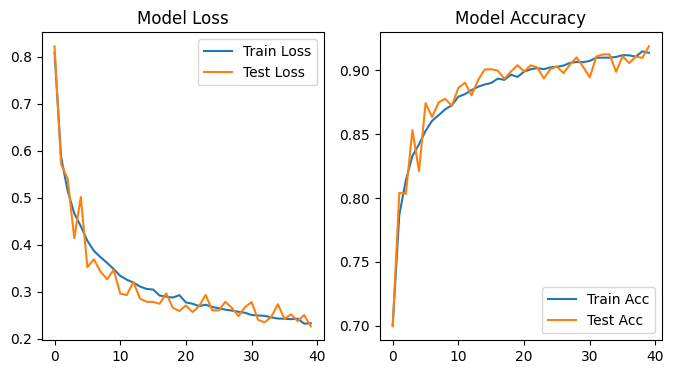

In [ ]:
plot_loss_acc(result_5)

# PyTorch Fashion MNIST

In [9]:
pip install torchmetrics

In [62]:
import torch
from torch import nn

#torchvision for datasets and image transformation
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

#split into mini batches
from torch.utils.data import DataLoader

import torchmetrics, mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

from tqdm.auto import tqdm
from timeit import default_timer as timer

import os

from torchsummary import summary
from torchvision.transforms import v2

In [23]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(device)

cpu


In [11]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [19]:
#sample data
image, label = train_data[0]

class_names = train_data.classes
print(image.shape)
print(class_names)

torch.Size([1, 28, 28])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


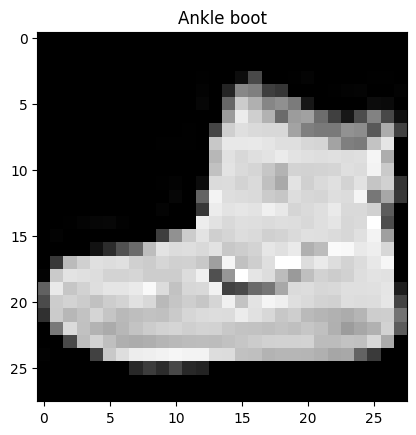

In [15]:
fig, ax = plt.subplots()

plt.imshow(image.squeeze(), cmap = 'grey')
ax.set_title(label = class_names[label])
plt.show();

In [18]:
#Put dataset in dataloader, making it into batches
batch_size = 32
num_workers = os.cpu_count()

train_dataloader = DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = num_workers)
test_dataloader = DataLoader(test_data, batch_size = batch_size, shuffle = False, num_workers = num_workers)

In [31]:
#Base Model
class BaseModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_3 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_4 = nn.Sequential(
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (2, 2), stride = 2),
            nn.ReLU()
        )

        self.connected_layer = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 256, out_features = 512),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 512, out_features = 10)
        )

    def forward(self, x):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_4(x)
        x = self.connected_layer(x)

        return x

In [45]:
base_model = BaseModel().to(device)
summary(base_model, input_size = image.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 13, 13]             320
              ReLU-2           [-1, 32, 13, 13]               0
            Conv2d-3             [-1, 64, 6, 6]          18,496
              ReLU-4             [-1, 64, 6, 6]               0
            Conv2d-5            [-1, 128, 2, 2]          73,856
              ReLU-6            [-1, 128, 2, 2]               0
            Conv2d-7            [-1, 256, 1, 1]         131,328
              ReLU-8            [-1, 256, 1, 1]               0
           Flatten-9                  [-1, 256]               0
          Dropout-10                  [-1, 256]               0
           Linear-11                  [-1, 512]         131,584
             ReLU-12                  [-1, 512]               0
          Dropout-13                  [-1, 512]               0
           Linear-14                   

In [33]:
def train_step(model, dataloader, loss_fcn, optimizer, device):

    model.train()

    train_loss = 0
    train_acc = 0

    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)

        y_pred = model(X)

        loss = loss_fcn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
        train_acc += ((y_pred_class == y)).sum().item()/len(y_pred)

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc

In [34]:
def test_step(model, dataloader, loss_fcn, device):

    test_loss = 0
    test_acc = 0

    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X = X.to(device)
            y = y.to(device)

            y_pred = model(X)

            loss = loss_fcn(y_pred, y)
            test_loss += loss.item()

            y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
            test_acc += ((y_pred_class == y)).sum().item()/len(y_pred)

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

    return test_loss, test_acc

In [43]:
def training(model, train_dataloader, test_dataloader, optimizer, device, loss_fcn = nn.CrossEntropyLoss(), display_interval = 1, epochs = 15):
    results = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}

    for epoch in tqdm(range(epochs)):
        train_start = timer()
        train_loss, train_acc = train_step(model, train_dataloader, loss_fcn, optimizer, device)
        train_end = timer()
        test_start = timer()
        test_loss, test_acc = test_step(model, test_dataloader, loss_fcn, device)
        test_end = timer()

        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

        if epoch == 0 or (epoch+1)%display_interval == 0:
            print(f"Epoch {epoch + 1}| train loss: {train_loss:.3f} | train acc: {train_acc:.3f} | train time: {train_end - train_start:.3f} | test loss: {test_loss:.3f} | test acc: {test_acc:.3f} | test time: {test_end - test_start:.3f}")

    return results

In [46]:
optimizer = torch.optim.Adam(params = base_model.parameters(), lr = 0.001)
loss_fcn = nn.CrossEntropyLoss()

start_time = timer()
results = training(base_model, train_dataloader, test_dataloader, optimizer, device, loss_fcn)
end_time = timer()
print(f"Total Time: {end_time - start_time:.3f}")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1| train loss: 0.586 | train acc: 0.782 | train time: 32.824 | test loss: 0.426 | test acc: 0.841 | test time: 2.740
Epoch 2| train loss: 0.386 | train acc: 0.856 | train time: 42.936 | test loss: 0.373 | test acc: 0.861 | test time: 3.497
Epoch 3| train loss: 0.329 | train acc: 0.877 | train time: 44.953 | test loss: 0.345 | test acc: 0.876 | test time: 1.915
Epoch 4| train loss: 0.293 | train acc: 0.892 | train time: 28.798 | test loss: 0.327 | test acc: 0.880 | test time: 1.951
Epoch 5| train loss: 0.264 | train acc: 0.901 | train time: 30.192 | test loss: 0.341 | test acc: 0.880 | test time: 1.659
Epoch 6| train loss: 0.240 | train acc: 0.909 | train time: 29.277 | test loss: 0.311 | test acc: 0.892 | test time: 1.659
Epoch 7| train loss: 0.216 | train acc: 0.918 | train time: 30.615 | test loss: 0.333 | test acc: 0.883 | test time: 1.684
Epoch 8| train loss: 0.203 | train acc: 0.923 | train time: 29.297 | test loss: 0.313 | test acc: 0.897 | test time: 1.643
Epoch 9| train l

In [47]:
def plot_loss_acc(results):
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))

    ax[0].plot(results['train_loss'], label = 'Train Loss')
    ax[0].plot(results['test_loss'], label = 'Test Loss')
    ax[0].set_title('Model Loss')
    ax[0].legend()

    ax[1].plot(results['train_acc'], label = 'Train Acc')
    ax[1].plot(results['test_acc'], label = 'Test Acc')
    ax[1].set_title('Model Accuracy')
    ax[1].legend()

    plt.show()

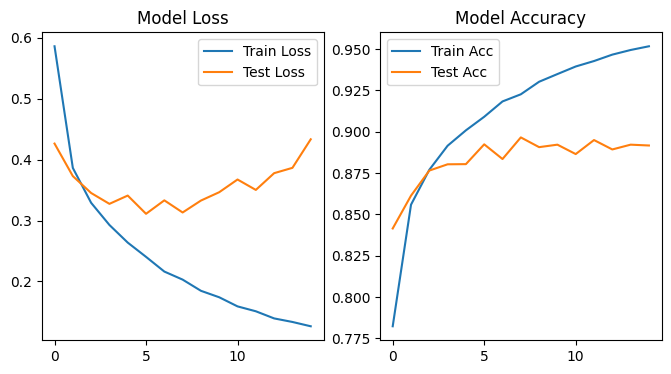

In [48]:
plot_loss_acc(results)

In [49]:
class CNNModel_Dropout(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_3 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), stride = 2),
            nn.ReLU()
        )

        self.conv_layer_4 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (2, 2), stride = 2),
            nn.ReLU()
        )

        self.connected_layer = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 256, out_features = 512),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 512, out_features = 10)
        )

    def forward(self, x):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_4(x)
        x = self.connected_layer(x)

        return x

In [50]:
model_dropout = CNNModel_Dropout()

In [51]:
optimizer = torch.optim.Adam(params = model_dropout.parameters(), lr = 0.001)
loss_fcn = nn.CrossEntropyLoss()

start_time = timer()
results = training(model_dropout, train_dataloader, test_dataloader, optimizer, device, loss_fcn)
end_time = timer()
print(f"Total Time: {end_time - start_time:.3f}")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1| train loss: 0.620 | train acc: 0.767 | train time: 38.173 | test loss: 0.463 | test acc: 0.823 | test time: 1.746
Epoch 2| train loss: 0.435 | train acc: 0.836 | train time: 32.758 | test loss: 0.387 | test acc: 0.851 | test time: 1.898
Epoch 3| train loss: 0.380 | train acc: 0.859 | train time: 34.227 | test loss: 0.351 | test acc: 0.867 | test time: 1.974
Epoch 4| train loss: 0.355 | train acc: 0.867 | train time: 31.168 | test loss: 0.340 | test acc: 0.875 | test time: 1.690
Epoch 5| train loss: 0.331 | train acc: 0.876 | train time: 31.738 | test loss: 0.316 | test acc: 0.883 | test time: 2.099
Epoch 6| train loss: 0.317 | train acc: 0.881 | train time: 31.737 | test loss: 0.304 | test acc: 0.886 | test time: 1.741
Epoch 7| train loss: 0.307 | train acc: 0.885 | train time: 30.388 | test loss: 0.302 | test acc: 0.890 | test time: 1.702
Epoch 8| train loss: 0.297 | train acc: 0.889 | train time: 31.259 | test loss: 0.291 | test acc: 0.896 | test time: 1.711
Epoch 9| train l

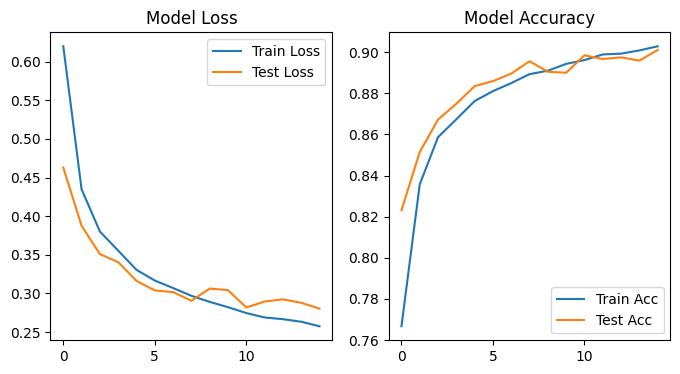

In [52]:
plot_loss_acc(results)

In [55]:
class CNNModel_Batch_Norm(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = (3, 3), stride = 2),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), stride = 2),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.conv_layer_3 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), stride = 2),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )

        self.conv_layer_4 = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (2, 2), stride = 2),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        self.connected_layer = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 256, out_features = 512),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            nn.Linear(in_features = 512, out_features = 10)
        )

    def forward(self, x):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_4(x)
        x = self.connected_layer(x)

        return x

In [56]:
model_batchnorm = CNNModel_Batch_Norm()

In [58]:
optimizer = torch.optim.Adam(params = model_batchnorm.parameters(), lr = 0.001)
loss_fcn = nn.CrossEntropyLoss()

start_time = timer()
results = training(model_batchnorm, train_dataloader, test_dataloader, optimizer, device, loss_fcn, epochs = 25)
end_time = timer()
print(f"Total Time: {end_time - start_time:.3f}")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1| train loss: 0.512 | train acc: 0.811 | train time: 45.091 | test loss: 0.391 | test acc: 0.851 | test time: 1.778
Epoch 2| train loss: 0.409 | train acc: 0.848 | train time: 36.873 | test loss: 0.435 | test acc: 0.838 | test time: 1.897
Epoch 3| train loss: 0.371 | train acc: 0.861 | train time: 35.531 | test loss: 0.324 | test acc: 0.880 | test time: 1.864
Epoch 4| train loss: 0.345 | train acc: 0.872 | train time: 34.884 | test loss: 0.320 | test acc: 0.881 | test time: 1.994
Epoch 5| train loss: 0.331 | train acc: 0.877 | train time: 34.221 | test loss: 0.325 | test acc: 0.880 | test time: 2.850
Epoch 6| train loss: 0.317 | train acc: 0.883 | train time: 34.235 | test loss: 0.295 | test acc: 0.893 | test time: 2.710
Epoch 7| train loss: 0.306 | train acc: 0.887 | train time: 34.715 | test loss: 0.286 | test acc: 0.895 | test time: 2.214
Epoch 8| train loss: 0.294 | train acc: 0.891 | train time: 34.966 | test loss: 0.283 | test acc: 0.896 | test time: 1.772
Epoch 9| train l

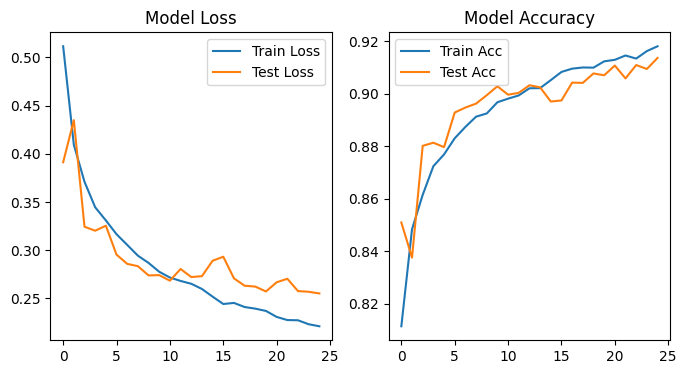

In [59]:
plot_loss_acc(results)

In [78]:
train_transform = v2.Compose([

    v2.RandomHorizontalFlip(p = 0.3),
    v2.RandomVerticalFlip(p = 0.3),
    v2.RandomRotation(30),
    v2.RandomZoomOut(p = 0.1),
    #v2.RandomCrop((224, 224)),
    v2.Resize(size = (28, 28)),
    v2.ToTensor()
])

In [79]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = train_transform,
    target_transform = None
)

train_dataloader = DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = num_workers)

In [80]:
print(train_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
                 RandomHorizontalFlip(p=0.3)
                 RandomVerticalFlip(p=0.3)
                 RandomRotation(degrees=[-30.0, 30.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0)
                 RandomZoomOut(p=0.1, fill=0, side_range=(1.0, 4.0))
                 Resize(size=[28, 28], interpolation=InterpolationMode.BILINEAR, antialias=True)
                 ToTensor()
           )


In [81]:
model_batchnorm_augmented = CNNModel_Batch_Norm()

In [82]:
optimizer = torch.optim.Adam(params = model_batchnorm_augmented.parameters(), lr = 0.001)
loss_fcn = nn.CrossEntropyLoss()

start_time = timer()
results = training(model_batchnorm_augmented, train_dataloader, test_dataloader, optimizer, device, loss_fcn, epochs = 25)
end_time = timer()
print(f"Total Time: {end_time - start_time:.3f}")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1| train loss: 0.943 | train acc: 0.650 | train time: 44.943 | test loss: 0.572 | test acc: 0.783 | test time: 1.806
Epoch 2| train loss: 0.781 | train acc: 0.706 | train time: 45.388 | test loss: 0.505 | test acc: 0.809 | test time: 1.787
Epoch 3| train loss: 0.724 | train acc: 0.730 | train time: 44.584 | test loss: 0.484 | test acc: 0.823 | test time: 1.803
Epoch 4| train loss: 0.690 | train acc: 0.741 | train time: 45.899 | test loss: 0.476 | test acc: 0.816 | test time: 1.769
Epoch 5| train loss: 0.667 | train acc: 0.750 | train time: 45.109 | test loss: 0.441 | test acc: 0.840 | test time: 1.741
Epoch 6| train loss: 0.646 | train acc: 0.757 | train time: 46.627 | test loss: 0.429 | test acc: 0.840 | test time: 1.823
Epoch 7| train loss: 0.632 | train acc: 0.763 | train time: 45.979 | test loss: 0.410 | test acc: 0.848 | test time: 1.809
Epoch 8| train loss: 0.619 | train acc: 0.770 | train time: 46.898 | test loss: 0.407 | test acc: 0.850 | test time: 1.804
Epoch 9| train l

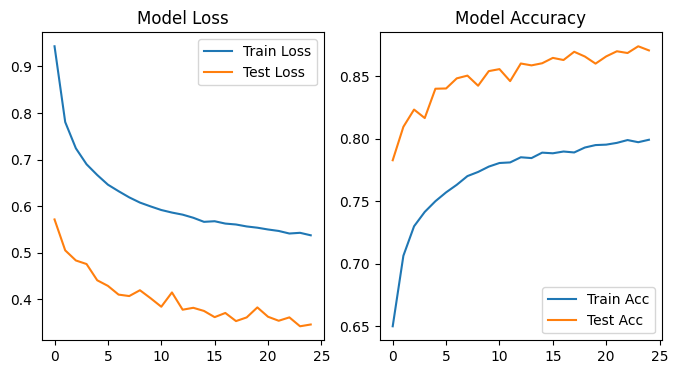

In [83]:
plot_loss_acc(results)

#TensorFlow on cifar-10 Dataset

In [ ]:
cifar10 = datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
print(f'X_train shape: {X_train.shape} | X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape} | y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3) | X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1) | y_test shape: (10000, 1)


In [ ]:
labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [ ]:
X_train = X_train/255.
X_test = X_test/255.

y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
def data_augmentation(flip = 'horizontal', rotation = 0.1, zoom = 0.1, cropped_size = (26, 26), stddev = 0.01):
    return Sequential([
        RandomFlip(flip),
        RandomRotation(rotation),
        RandomZoom(zoom),
       # RandomCrop(height = cropped_size[0], width = cropped_size[1]),
       # GaussianNoise(stddev = stddev)
    ])

In [ ]:
input_shape = X_train[0].shape
no_of_classes = len(labels)

augmentation = data_augmentation()

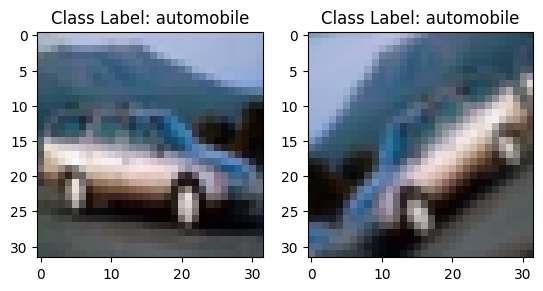

In [ ]:
image = X_train[4]
label = y_train[4]

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image.squeeze())
ax[0].set_title(f'Class Label: {labels[label]}')

ax[1].imshow(augmentation(image).numpy().squeeze())
ax[1].set_title(f'Class Label: {labels[label]}')

plt.show();

In [ ]:
i = Input(shape = input_shape)
x = augmentation(i)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 1024, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_1 = Model(i, x)

In [ ]:
model_1.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 8, 8, 128)           │              

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

result_1 = model_1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.3418 - loss: 2.0136 - val_accuracy: 0.4146 - val_loss: 1.8376
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.5326 - loss: 1.3044 - val_accuracy: 0.5130 - val_loss: 1.5989
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6088 - loss: 1.0983 - val_accuracy: 0.5910 - val_loss: 1.1826
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6594 - loss: 0.9799 - val_accuracy: 0.6438 - val_loss: 1.1079
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6918 - loss: 0.8865 - val_accuracy: 0.6878 - val_loss: 0.9263
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7134 - loss: 0.8278 - val_accuracy: 0.6749 - val_loss: 0.9980
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7335 - loss: 0.7730 - val_accuracy: 0.7144 - val_loss: 0.8968
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7456 -

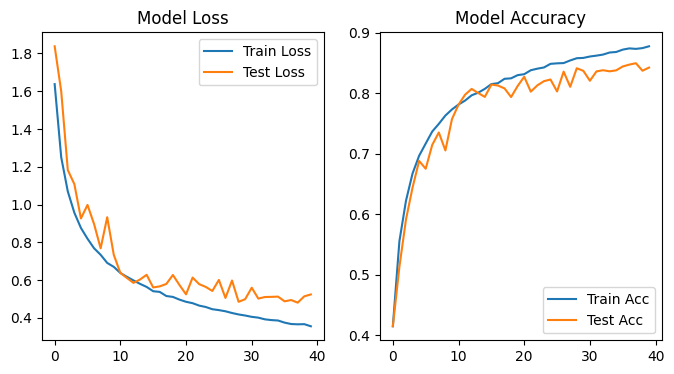

In [ ]:
plot_loss_acc(result_1)

In [ ]:
i = Input(shape = input_shape)
x = augmentation(i)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_2 = Model(i, x)

In [ ]:
model_2.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 16, 16, 64)          │          36,9

 Total params: 2,491,786 (9.51 MB)

 Trainable params: 2,488,906 (9.49 MB)

 Non-trainable params: 2,880 (11.25 KB)

In [ ]:
model_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

result_2 = model_2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.2335 - loss: 2.1038 - val_accuracy: 0.3096 - val_loss: 2.0626
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4450 - loss: 1.4904 - val_accuracy: 0.5219 - val_loss: 1.4152
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.5629 - loss: 1.2420 - val_accuracy: 0.5535 - val_loss: 1.3168
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6195 - loss: 1.0910 - val_accuracy: 0.6012 - val_loss: 1.3263
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.6697 - loss: 0.9770 - val_accuracy: 0.6738 - val_loss: 1.0268
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7002 - loss: 0.8855 - val_accuracy: 0.6621 - val_loss: 1.0286
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7252 - loss: 0.8091 - val_accuracy: 0.7112 - val_loss: 0.9320
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.7396 -

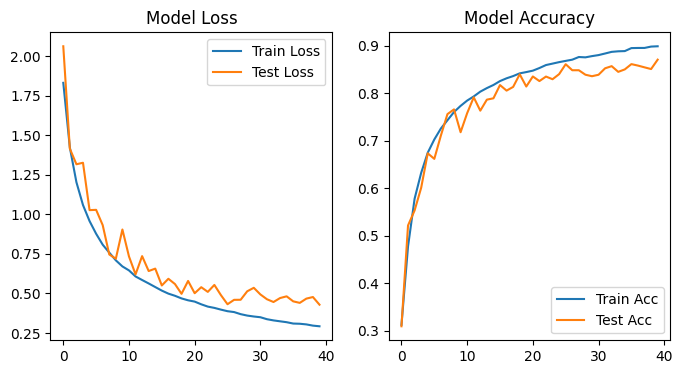

In [ ]:
plot_loss_acc(result_2)

In [ ]:
i = Input(shape = input_shape)
x = augmentation(i)

x = ZeroPadding2D((3, 3))(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x1_shortcut = x
x1_shortcut = Conv2D(filters = 64, kernel_size = (1, 1), strides = 2, padding = 'valid')(x1_shortcut)
x1_shortcut = BatchNormalization()(x1_shortcut)

x = Conv2D(filters = 64, kernel_size = (1, 1), strides = 2, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Add()([x1_shortcut, x])
x = Activation('relu')(x)
#x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x2_shortcut = x
x2_shortcut = Conv2D(filters = 128, kernel_size = (1, 1), strides = 2, padding = 'valid')(x2_shortcut)
x2_shortcut = BatchNormalization()(x2_shortcut)

x = Conv2D(filters = 128, kernel_size = (1, 1), strides = 2, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Add()([x2_shortcut, x])
x = Activation('relu')(x)
#x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x3_shortcut = x
x3_shortcut = Conv2D(filters = 1024, kernel_size = (1, 1), strides = 2, padding = 'valid')(x3_shortcut)
x3_shortcut = BatchNormalization()(x3_shortcut)

x = Conv2D(filters = 256, kernel_size = (1, 1), strides = 2, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 256, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters = 1024, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Add()([x3_shortcut, x])
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

model_3 = Model(i, x)

In [ ]:
model_3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequential) │ (None, 32, 32, 3)      │              0 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_7          │ (None, 38, 38, 3)      │              0 │ sequential_3[7][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 38, 38, 64)     │          1,792 │ zero_padding2d_7[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_54    │ (None, 38, 38, 64)     │            256 │ conv2d_55[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_40             │ (None, 38, 38, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 19, 19, 64)     │              0 │ activation_40[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 10, 10, 64)     │          4,160 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_56    │ (None, 10, 10, 64)     │            256 │ conv2d_57[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_41             │ (None, 10, 10, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 10, 10, 64)     │         36,928 │ activation_41[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_57    │ (None, 10, 10, 64)     │            256 │ conv2d_58[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_42             │ (None, 10, 10, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 10, 10, 64)     │          4,160 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 10, 10, 64)     │         36,928 │ activation_42[0][0]    │
├──────────────────────

 Total params: 4,054,794 (15.47 MB)

 Trainable params: 4,048,010 (15.44 MB)

 Non-trainable params: 6,784 (26.50 KB)

In [ ]:
model_3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

result_3 = model_3.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 25)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 41ms/step - accuracy: 0.3384 - loss: 2.0496 - val_accuracy: 0.3615 - val_loss: 1.8545
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.5144 - loss: 1.3691 - val_accuracy: 0.4623 - val_loss: 1.5344
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - accuracy: 0.5699 - loss: 1.2175 - val_accuracy: 0.5510 - val_loss: 1.2559
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.6051 - loss: 1.1318 - val_accuracy: 0.4492 - val_loss: 1.7201
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6353 - loss: 1.0504 - val_accuracy: 0.5781 - val_loss: 1.2665
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6516 - loss: 0.9909 - val_accuracy: 0.5709 - val_loss: 1.4042
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6674 - loss: 0.9482 - val_accuracy: 0.5934 - val_loss: 1.1999
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6803 - loss: 0.9136 - 

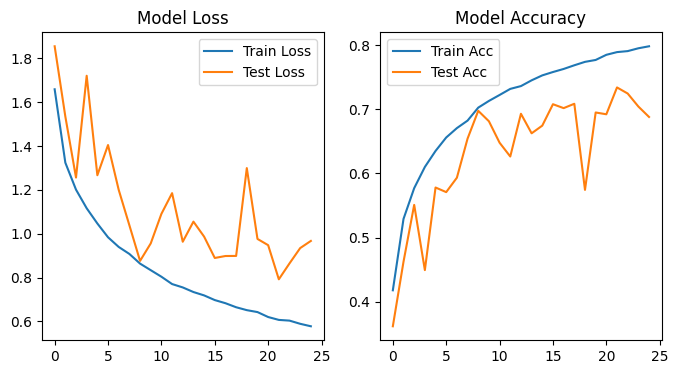

In [ ]:
plot_loss_acc(result_3)

## Residual Network

In [ ]:
def id_block(x, f, filters):

    f_1, f_2, f_3 = filters

    x_shortcut = x

    x = Conv2D(filters = f_1, kernel_size = (1, 1), strides = 1, padding = 'valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters = f_2, kernel_size = (f, f), strides = 1, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters = f_3, kernel_size = (1, 1), strides = 1, padding = 'valid')(x)
    x = BatchNormalization()(x)

    x = Add()([x_shortcut, x])
    x = Activation('relu')(x)

    return x

In [ ]:
def conv_block(x, f, filters, s):

    f_1, f_2, f_3 = filters

    x_shortcut = x

    x = Conv2D(filters = f_1, kernel_size = (1, 1), strides = s, padding = 'valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters = f_2, kernel_size = (f, f), strides = 1, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters = f_3, kernel_size = (1, 1), strides = 1, padding = 'valid')(x)
    x = BatchNormalization()(x)

    x_shortcut = Conv2D(filters = f_3, kernel_size = (1, 1), strides = s, padding = 'valid')(x_shortcut)
    x_shortcut = BatchNormalization()(x_shortcut)

    x = Add()([x_shortcut, x])
    x = Activation('relu')(x)

    return x

In [ ]:
i = Input(shape = input_shape)
#x = augmentation(i)

x = ZeroPadding2D((2,2))(i)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = conv_block(x, f = 3, filters = [32, 32, 128], s = 2)
x = id_block(x, f = 3, filters = [32, 32, 128])
x = id_block(x, f = 3, filters = [32, 32, 128])

x = conv_block(x, f = 3, filters = [64, 64, 256], s = 2)
x = id_block(x, f = 3, filters = [64, 64, 256])
x = id_block(x, f = 3, filters = [64, 64, 256])
x = id_block(x, f = 3, filters = [64, 64, 256])

x = conv_block(x, f = 3, filters = [128, 128, 512], s = 2)
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])

x = MaxPooling2D(pool_size = (2,2), strides = 1)(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

ResNet = Model(i, x)

In [ ]:
ResNet.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 36, 36, 3)      │              0 │ input_layer_4[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_99 (Conv2D)        │ (None, 36, 36, 32)     │            896 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_99    │ (None, 36, 36, 32)     │            128 │ conv2d_99[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_90             │ (None, 36, 36, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 18, 18, 32)     │              0 │ activation_90[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_100 (Conv2D)       │ (None, 9, 9, 32)       │          1,056 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_100   │ (None, 9, 9, 32)       │            128 │ conv2d_100[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_91             │ (None, 9, 9, 32)       │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_101 (Conv2D)       │ (None, 9, 9, 32)       │          9,248 │ activation_91[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_101   │ (None, 9, 9, 32)       │            128 │ conv2d_101[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_92             │ (None, 9, 9, 32)       │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_103 (Conv2D)       │ (None, 9, 9, 128)      │          4,224 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_102 (Conv2D)       │ (None, 9, 9, 128)      │          4,224 │ activation_92[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_103   │ (None, 9, 9, 128)      │            512 │ conv2d_103[0][0]       │
│ (BatchNormalization) 

 Total params: 2,654,410 (10.13 MB)

 Trainable params: 2,642,186 (10.08 MB)

 Non-trainable params: 12,224 (47.75 KB)

In [ ]:
ResNet.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ResNet = ResNet.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.2168 - loss: 2.8494 - val_accuracy: 0.3868 - val_loss: 1.6397
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.4322 - loss: 1.5454 - val_accuracy: 0.3764 - val_loss: 1.7920
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.4946 - loss: 1.4148 - val_accuracy: 0.4576 - val_loss: 1.5210
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5502 - loss: 1.2900 - val_accuracy: 0.5379 - val_loss: 1.2518
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.5598 - loss: 1.2527 - val_accuracy: 0.5269 - val_loss: 1.3465
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5675 - loss: 1.2355 - val_accuracy: 0.5422 - val_loss: 1.3423
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.5560 - loss: 1.2607 - val_accuracy: 0.5956 - val_loss: 1.1527
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.6164 -

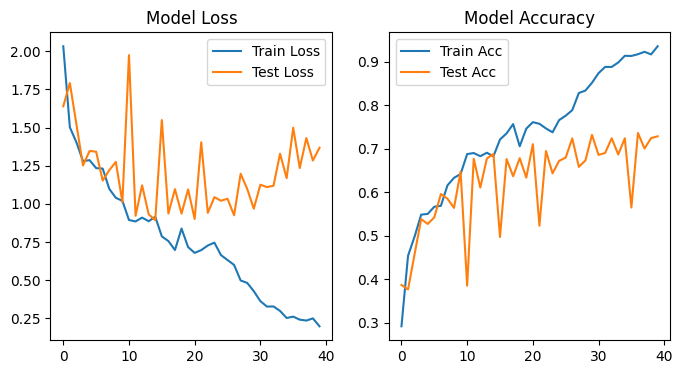

In [ ]:
plot_loss_acc(ResNet)

In [ ]:
i = Input(shape = input_shape)
x = augmentation(i)

x = ZeroPadding2D((2,2))(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2,2), strides = 2)(x)

x = conv_block(x, f = 3, filters = [32, 32, 128], s = 2)
x = id_block(x, f = 3, filters = [32, 32, 128])
x = id_block(x, f = 3, filters = [32, 32, 128])

x = conv_block(x, f = 3, filters = [64, 64, 256], s = 2)
x = id_block(x, f = 3, filters = [64, 64, 256])
x = id_block(x, f = 3, filters = [64, 64, 256])
x = id_block(x, f = 3, filters = [64, 64, 256])

x = conv_block(x, f = 3, filters = [128, 128, 512], s = 2)
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])

x = MaxPooling2D(pool_size = (2,2), strides = 1)(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

ResNet_2 = Model(i, x)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_dataset = train_dataset.shuffle(buffer_size = 10_000).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
ResNet_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ResNet_2 = ResNet_2.fit(train_dataset, validation_data = test_dataset, epochs = 40)

Epoch 1/40
 416/1563 ━━━━━━━━━━━━━━━━━━━━ 1:10 61ms/step - accuracy: 0.1367 - loss: 4.3809

KeyboardInterrupt: 

In [ ]:
i = Input(shape = input_shape)
#x = augmentation(i)

x = ZeroPadding2D((3,3))(i)
x = Conv2D(filters = 64, kernel_size = (7, 7), strides = 2, padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (3,3), strides = 2)(x)

x = conv_block(x, f = 3, filters = [64, 64, 256], s = 1)
x = id_block(x, f = 3, filters = [64, 64, 256])
x = id_block(x, f = 3, filters = [64, 64, 256])

x = conv_block(x, f = 3, filters = [128, 128, 512], s = 2)
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])
x = id_block(x, f = 3, filters = [128, 128, 512])

x = conv_block(x, f = 3, filters = [256, 256, 1024], s = 2)
x = id_block(x, f = 3, filters = [256, 256, 1024])
x = id_block(x, f = 3, filters = [256, 256, 1024])
x = id_block(x, f = 3, filters = [256, 256, 1024])
x = id_block(x, f = 3, filters = [256, 256, 1024])
x = id_block(x, f = 3, filters = [256, 256, 1024])

x = conv_block(x, f = 3, filters = [512, 512, 2048], s = 2)
x = id_block(x, f = 3, filters = [512, 512, 2048])
x = id_block(x, f = 3, filters = [512, 512, 2048])

#x = AveragePooling2D(pool_size = (2,2))(x)

x = Flatten()(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(units = no_of_classes, activation = 'softmax')(x)

ResNet_50 = Model(i, x)

In [ ]:
ResNet_50.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_7          │ (None, 38, 38, 3)      │              0 │ input_layer_8[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_279 (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ zero_padding2d_7[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_279   │ (None, 16, 16, 64)     │            256 │ conv2d_279[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_256            │ (None, 16, 16, 64)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 7, 7, 64)       │              0 │ activation_256[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_280 (Conv2D)       │ (None, 7, 7, 64)       │          4,160 │ max_pooling2d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_280   │ (None, 7, 7, 64)       │            256 │ conv2d_280[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_257            │ (None, 7, 7, 64)       │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_281 (Conv2D)       │ (None, 7, 7, 64)       │         36,928 │ activation_257[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_281   │ (None, 7, 7, 64)       │            256 │ conv2d_281[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_258            │ (None, 7, 7, 64)       │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_283 (Conv2D)       │ (None, 7, 7, 256)      │         16,640 │ max_pooling2d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_282 (Conv2D)       │ (None, 7, 7, 256)      │         16,640 │ activation_258[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_283   │ (None, 7, 7, 256)      │          1,024 │ conv2d_283[0][0]       │
│ (BatchNormalization) 

 Total params: 24,641,930 (94.00 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
ResNet_50.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ResNet_50 = ResNet_50.fit(train_dataset, validation_data = test_dataset, epochs = 40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 47ms/step - accuracy: 0.2732 - loss: 2.1227 - val_accuracy: 0.4330 - val_loss: 1.5348
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 31ms/step - accuracy: 0.4178 - loss: 1.6106 - val_accuracy: 0.2698 - val_loss: 1.9972
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.4908 - loss: 1.4281 - val_accuracy: 0.2691 - val_loss: 2.1206
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.4166 - loss: 1.6028 - val_accuracy: 0.1828 - val_loss: 2.8829
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4192 - loss: 1.6028 - val_accuracy: 0.4430 - val_loss: 1.5077
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.4793 - loss: 1.4732 - val_accuracy: 0.2969 - val_loss: 1.9307
Epoch 7/40
